# Data Mining Lab 2

### Student Information
Name: Yu-An Lin

Student ID: 109061529

GitHub ID:

Kaggle name:109061529

Kaggle private scoreboard snapshot:

[Snapshot](snapshot of kaggle.png)

---
## Outline
- <a href='#part1'>Part 1</a>
- <a href='#part2kaggle'>Part 2 Kaggle </a>
    - <a href='#part2kaggle-preprocessing'>Part 2 - Preprocessing </a>
    - <a href='#part2kaggle-bert'>Part 2 - BERT </a>
    - <a href='#part2kaggle-sklearn'>Part 2 - sklearn</a>
    - <a href='#part2kaggle-keras'>Part 2 - Keras</a>

<div id='part1'> </div>

## Part 1

In [1]:
import os
import json 
import re
import emoji
import tensorflow
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import function
import nltk

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


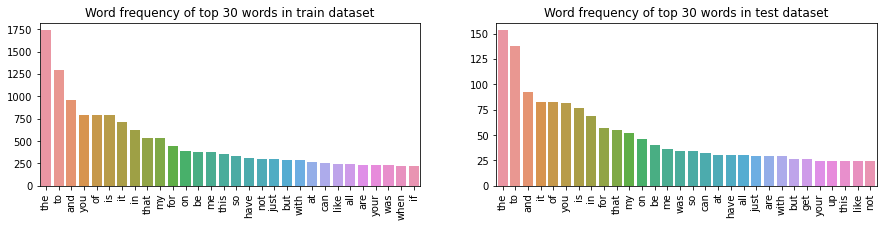

In [1]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

count_vect = CountVectorizer()
train_count = count_vect.fit_transform(train_df.text)
train_count_freq = np.array(np.sum(train_count, axis=0)).reshape(-1)
plot_x = np.array(count_vect.get_feature_names()).reshape(-1)
ind = np.argsort(train_count_freq)[::-1]
fig = plt.figure(0, [15,3])
ax1 = fig.add_subplot(1, 2, 1) # two rows, one column, first plot
g = sns.barplot(x=plot_x[list(ind[:30])], 
            y=train_count_freq[list(ind[:30])], ax=ax1)
g.set_title('Word frequency of top 30 words in train dataset')
g.set_xticklabels(plot_x[list(ind[:30])], rotation = 90);

count_vect = CountVectorizer()
test_count = count_vect.fit_transform(test_df.text)
test_count_freq = np.array(np.sum(test_count, axis=0)).reshape(-1)
plot_x = np.array(count_vect.get_feature_names()).reshape(-1)
ind = np.argsort(test_count_freq)[::-1]
ax2 = fig.add_subplot(1, 2, 2) 
g = sns.barplot(x=plot_x[list(ind[:30])], 
            y=test_count_freq[list(ind[:30])], ax=ax2)
g.set_title('Word frequency of top 30 words in test dataset')
g.set_xticklabels(plot_x[list(ind[:30])], rotation = 90);
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [7]:
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize, token_pattern=None) 

TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

print(train_data_TFIDF_features_1000.shape)
print(TFIDF_1000.get_feature_names()[100:110])

(3613, 1000)
['awareness', 'away', 'awe', 'awesome', 'awful', 'b', 'baby', 'back', 'bad', 'ball']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

The boxes in the diagonal represent the right classicification cases, while others are the wrong classicification cases with different predict label and true label. 

For example, there are 19 cases is actually fear, but the model predicted them as anger. And the actual joy and sadness case number predicted as anger are much less than a half of fear cases. So, we can say the model is a little bit confused with anger and fear. In contrast, we may also say that joy is distinguishable from anger with the evidence that the model also predicted less joy as anger.

From the prediction of fear, the wrong classification number to other categories are close. But the right prediction of fear is much more than other categories. Maybe we can say that the  model can distinguish fear better than other emotion.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

training accuracy: 0.79
testing accuracy: 0.69


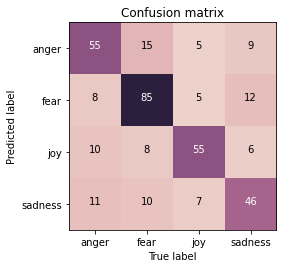

In [8]:
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize, token_pattern=None) 
BOW_500.fit(train_df['text'])

X_train, X_test = BOW_500.transform(train_df['text']), BOW_500.transform(test_df['text'])
y_train, y_test = train_df['emotion'], test_df['emotion']

NB = MultinomialNB()
NB.fit(X_train, y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
function.plot_confusion_matrix(cm, classes=my_tags, title='NB Confusion matrix', size=(4,4))

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The algorithm behind Decision Tree is keep separating data with branches. So, it is easy overfitting and get a high accuracy in the training data. We need to set the max-depth of the DTmodel, so that the we can improve the accuracy of testing data from 0.66 to 0.69; In contrast, the training accuracy will decrease from 0.99 to 0.85. 

For Naive Bayes model, it is not easy to overfitting, because it will count the classical probability. Probability won't be different with the same word exists in the sentence. But this feature may not deal with the polysemous, which may lead to the lower accuracy of the training data. At least, the accuracy difference between training data and testing data is less than DT when they want to maintain the accuracy of testing data.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

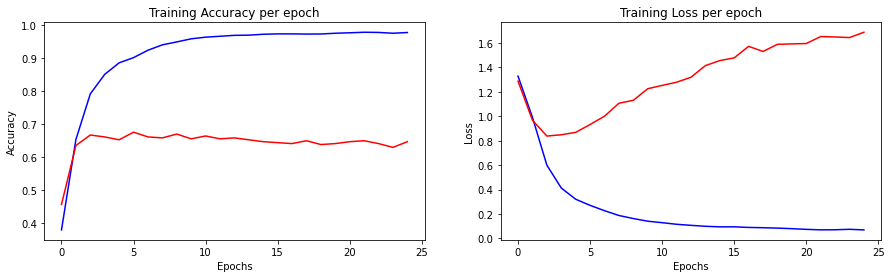

In [30]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

plt.figure(0,[15,4])
plt.subplot(121)
plt.plot(training_log['accuracy'], 'b-', training_log['val_accuracy'], 'r-')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title('Training Accuracy per epoch')
plt.subplot(122)
plt.plot(training_log['loss'], 'b-', training_log['val_loss'], 'r-')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.title('Training Loss per epoch')
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


We can use methods below to utilize word2vec:
1. Pad the sentences with the same length, and then put them into the model with a series of (sentence_length, w2v_size) by apply w2v to every word.
2. Do sum or average on the output of 1.
3. Do the sum or average on the output of 1 with TFIDF. Because the TFIDF can somehow see as the weight to deal with important or unimportant words.

Or we can also train a doc2vec model directly.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

target words:  ['angry', 'happy', 'sad', 'fear', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


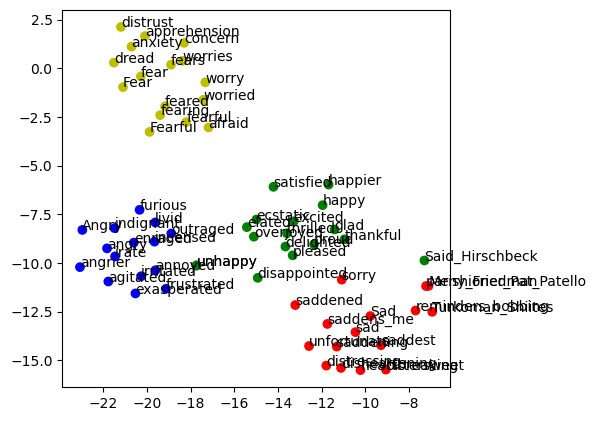

In [29]:
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

word_list = ['angry', 'happy', 'sad', 'fear']
target_words = [] + word_list
topn = 15
for word in word_list:
    target_words += [word_ for word_ , sim_ in w2v_google_model.most_similar(word, topn=topn)]
print('target words: ', target_words)

color = ['b', 'g', 'r', 'y'] + ['b'] * topn + ['g'] * topn + ['r'] * topn + ['y'] * topn

size = 200
target_size = len(target_words)
all_word = w2v_google_model.index_to_key
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
---
---

<div id='part2kaggle'></div>

## Part 2 Kaggle

<div id='part2kaggle-preprocessing' </div>

### Part 2 Kaggle - Preprocessing

In [2]:
# read given dataset
file = open('tweets_DM.json', 'r', encoding='utf-8')
tweet =[]
for line in file.readlines():
    data = json.loads(line)
    tweet.append(data)

identi = pd.read_csv('data_identification.csv')
emo_df = pd.read_csv('emotion.csv')

emo_dic = {}
for i in range(len(emo_df)):
    emo_dic[emo_df['tweet_id'][i]] = emo_df['emotion'][i]

In [3]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tok = tokenizer.encode('@someone you are so #CoolAndNice 😍😍')
print(tok)
for i in tok:
    print(tokenizer.decode(i), end=' | ')

sent = emoji.demojize('I like this 😍😍', delimiters=(" ", " "))
print('\n', sent)
tok = tokenizer.encode(sent)
print(tok)
for i in tok:
    print(tokenizer.decode(i), end=' | ')

[101, 1030, 2619, 2017, 2024, 2061, 1001, 4658, 5685, 8713, 2063, 100, 102]
[ C L S ] | @ | s o m e o n e | y o u | a r e | s o | # | c o o l | # # a n d | # # n i c | # # e | [ U N K ] | [ S E P ] | 
 I like this  smiling_face_with_heart-eyes  smiling_face_with_heart-eyes 
[101, 1045, 2066, 2023, 5629, 1035, 2227, 1035, 2007, 1035, 2540, 1011, 2159, 5629, 1035, 2227, 1035, 2007, 1035, 2540, 1011, 2159, 102]
[ C L S ] | i | l i k e | t h i s | s m i l i n g | _ | f a c e | _ | w i t h | _ | h e a r t | - | e y e s | s m i l i n g | _ | f a c e | _ | w i t h | _ | h e a r t | - | e y e s | [ S E P ] | 

I separate the preprocess into two kind of method. First one is for bert, and second one is for sklearn.


In Bert, it will help us separate the combined word in hashtag, so we don't really need to worry about the word in hashtag will confuse the bert model. But the emoji will recognize as [UNK]. The example is above. 
To analysis whether the emoji will influence performance of the model, I generate two preprocessed-files.
 - one drop @someone and decode emoji
 - one only drop @someone


 For sklearn preprocessing, I preserve the !,?,^ and ~, which I think they do present some emotion in the sentences. And some sentences contain < LH >, which means 'Laughing Hysterically'.So I replace the first < LH > with 'Laugh Hysterical' and drop redundant < LH >, because this is very common and do present some emotion, too. I also replace emoji with package 'emoji', because people may say irony but using the emoji to present their true emotion.

In [4]:
emotion_list = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
stemmer = PorterStemmer()
train_df = []; test_df = []
bert_train = []; bert_test = []
bert_train_emoji = []; bert_test_emoji = []
for i in range(len(tweet)):
    sent = tweet[i]['_source']['tweet']['text']
    sent = re.sub(r'@(\w+)', '', sent)
    bert_token = tokenizer(sent, return_token_type_ids=False)
    sent = emoji.demojize(sent, delimiters=(" ", " "))
    bert_token_emoji = tokenizer(sent, return_token_type_ids=False)
    sent = tokenizer.decode(bert_token.input_ids)[6:-6]
    sent = [tokenizer.decode(bert_token.input_ids[j+1]) for j in range(len(bert_token.input_ids)-2)]
    sent = re.sub('[|$|%|&|(|)|*|+|-|/|=|[|]|{|}|]', ' ', sent)
    sent = re.sub('[\"|,|.|:|;|_|0-9]', '', sent)
    sent = re.sub('([!?^~])', r' \1', sent)
    sent = re.sub(r"\'(\w+)", '', sent)
    sent = re.sub(r'<LH>', 'Laugh Hysterical', sent, count=1)
    sent = re.sub(r'<LH>', '', sent)
    sent = sent.split(' ')
    if '' in sent:
        sent.remove('')
    for j in range(len(sent)):
        sent[j] = stemmer.stem(sent[j])
    sent = ' '.join(sent)
    if tweet[i]['_source']['tweet']['tweet_id'] in emo_dic.keys():
        train_df.append( [  tweet[i]['_source']['tweet']['tweet_id'],
                            tweet[i]['_source']['tweet']['text'],
                            re.sub('#', '', sent),
                            re.sub(r'#(\w+)', '', sent),
                            emo_dic[tweet[i]['_source']['tweet']['tweet_id']]
                         ] )
        bert_train.append( [tweet[i]['_source']['tweet']['tweet_id'],
                            pad_sequences([bert_token.input_ids], maxlen=100, dtype="long", truncating="post", padding="post"),
                            pad_sequences([bert_token.attention_mask], maxlen=100, dtype="long", truncating="post", padding="post"),
                            emotion_list.index(emo_dic[tweet[i]['_source']['tweet']['tweet_id']])
                           ])
        bert_train_emoji.append( [tweet[i]['_source']['tweet']['tweet_id'],
                            pad_sequences([bert_token_emoji.input_ids], maxlen=100, dtype="long", truncating="post", padding="post"),
                            pad_sequences([bert_token_emoji.attention_mask], maxlen=100, dtype="long", truncating="post", padding="post"),
                            emotion_list.index(emo_dic[tweet[i]['_source']['tweet']['tweet_id']])
                           ])
    else:
        test_df.append( [   tweet[i]['_source']['tweet']['tweet_id'],
                            tweet[i]['_source']['tweet']['text'],
                            re.sub('#', '', sent),
                            re.sub(r'#(\w+)', '', sent),
                        ])
        bert_test.append(  [tweet[i]['_source']['tweet']['tweet_id'],
                            pad_sequences([bert_token.input_ids], maxlen=100, dtype="long", truncating="post", padding="post"),
                            pad_sequences([bert_token.attention_mask], maxlen=100, dtype="long", truncating="post", padding="post")
                           ])
        bert_test_emoji.append( [tweet[i]['_source']['tweet']['tweet_id'],
                            pad_sequences([bert_token_emoji.input_ids], maxlen=100, dtype="long", truncating="post", padding="post"),
                            pad_sequences([bert_token_emoji.attention_mask], maxlen=100, dtype="long", truncating="post", padding="post"),
                           ])
        
pd.DataFrame(train_df, columns=['id', 'text', 'prepro_sent', 'prepro_sent_no#', 'emotion']).to_json("train_kaggle.json", orient='split')
pd.DataFrame(test_df, columns=['id', 'text', 'prepro_sent', 'prepro_sent_no#']).to_json("test_kaggle.json", orient='split')
pd.DataFrame(bert_train, columns=['id', 'input_ids', 'mask', 'emotion']).to_json("train_bert.json", orient='split')
pd.DataFrame(bert_test, columns=['id', 'input_ids', 'mask']).to_json("test_bert.json", orient='split')
pd.DataFrame(bert_train_emoji, columns=['id', 'input_ids', 'mask', 'emotion']).to_json("train_bert_emoji.json", orient='split')
pd.DataFrame(bert_test_emoji, columns=['id', 'input_ids', 'mask']).to_json("test_bert_emoji.json", orient='split')

<div id='part2kaggle-bert'></div>

### Part 2 Kaggle - BERT

---
### Only drop @someoneversion
BERT need about 4 hour to train on my computer.

So I load pretrained model here with 10000 samples to show the accuracy.

The complete training steps is the same as the code below.

In [17]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from transformers import BertModel, AdamW
from transformers import BertForSequenceClassification
from torchsummary import summary
from tqdm.notebook import tqdm
import time
import torch

# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=8)
model = torch.load('BertSequenceClassification_0105_01.pkl')

In [7]:
file = open('train_bert.json', 'r', encoding='utf-8')
train_df = json.loads(file.readlines()[0])
train_df = pd.DataFrame(train_df['data'], columns=train_df['columns'])
train_df[0:2]

,id,input_ids,mask,emotion
0,0x376b20,"[[101, 2111, 2040, 2695, 1000, 5587, 2033, 200...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1
1,0x2d5350,"[[101, 2004, 2057, 2156, 1010, 8398, 2003, 479...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",4


In [19]:
train_inputs = torch.tensor(train_df['input_ids'].iloc[0:10000], dtype=torch.long).reshape(-1,100)
train_labels = torch.tensor(train_df['emotion'].iloc[0:10000], dtype=torch.long)
train_masks = torch.tensor(train_df['mask'].iloc[0:10000], dtype=torch.long).reshape(-1,100)
print(np.shape(train_inputs), np.shape(train_labels), np.shape(train_masks))

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=50)

torch.Size([10000, 100]) torch.Size([10000]) torch.Size([10000, 100])


In [9]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)
l1loss = torch.nn.L1Loss()

In [20]:
acc_train = []
model.train().cuda()
avg_loss = 0; acc = 0; 
for step, batch in tqdm(enumerate(train_dataloader),total=len(train_dataloader),desc='iteration',leave=False): 
    batch = tuple(t.cuda() for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    optimizer.zero_grad()
    cross, logit = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)[0:2]
    acc += l1loss(torch.argmax(logit, dim=1).float(), b_labels)
    cross.backward()
    optimizer.step()
    print(step, 'Inst_Loss:', '%.6f' % float(cross), ', ACC:', '%d' % float(acc), end = '\r')
    avg_loss += float(cross)
    if (step+1) % 500 == 0:
        print('\n')

print('\nAVG loss:', '%.6f' % avg_loss , ', ACC:', '%d' % float(acc))    
    
#     if (epoch+1)% 1 == 0:
#         torch.save(model, 'BertSequenceClassification_0105_1'.zfill(2)+'.pkl') 

iteration:   0%|          | 0/200 [00:00<?, ?it/s]

199 Inst_Loss: 0.754150 , ACC: 166
AVG loss: 158.931455 , ACC: 166


In [49]:
print('Accuracy of the \"only-drop-@someone\" version is :', '%.2f' % (100-acc/10000*100).cpu().numpy(), '%')

Accuracy of the "only-drop-@someone" version is : 98.34 %


In [25]:
file = open('test_bert.json', 'r', encoding='utf-8')
test_df = json.loads(file.readlines()[0])
test_df = pd.DataFrame(test_df['data'], columns=test_df['columns'])

test_inputs = torch.tensor(test_df['input_ids'], dtype=torch.long).reshape(-1,100)
test_masks = torch.tensor(test_df['mask']).reshape(-1,100)
print(np.shape(test_inputs), np.shape(test_masks))

test_data = TensorDataset(test_inputs, test_masks)
test_dataloader = DataLoader(test_data, shuffle=False, batch_size=50)

torch.Size([411972, 100]) torch.Size([411972, 100])


In [26]:
model.eval()
ans = []
for step, batch in enumerate(test_dataloader): 
    batch = tuple(t.cuda() for t in batch)
    b_input_ids, b_input_mask = batch
    logit = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)[0]
    ans += torch.argmax(logit, dim=1)

In [27]:
emotion_list = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
out = [emotion_list[ind] for ind in ans]
test_df['emotion'] = out
test_df[['id','emotion']].to_csv('submit_bert_0105.csv', index=False)

---
### With emoji replacement version
Also use pretrained model here with 10000 samples to show accuracy


In [36]:
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=8)
model = torch.load('BertSequenceClassification_0104_01.pkl')

In [37]:
file = open('train_bert_emoji.json', 'r', encoding='utf-8')
train_df = json.loads(file.readlines()[0])
train_df = pd.DataFrame(train_df['data'], columns=train_df['columns'])
train_df[0:2]

,id,input_ids,mask,emotion
0,0x376b20,"[[101, 2111, 2040, 2695, 1000, 5587, 2033, 200...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1
1,0x2d5350,"[[101, 2004, 2057, 2156, 1010, 8398, 2003, 479...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",4


In [38]:
train_inputs = torch.tensor(train_df['input_ids'].iloc[0:10000], dtype=torch.long).reshape(-1,100)
train_labels = torch.tensor(train_df['emotion'].iloc[0:10000], dtype=torch.long)
train_masks = torch.tensor(train_df['mask'].iloc[0:10000], dtype=torch.long).reshape(-1,100)
print(np.shape(train_inputs), np.shape(train_labels), np.shape(train_masks))

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=50)

torch.Size([10000, 100]) torch.Size([10000]) torch.Size([10000, 100])


In [39]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}]

optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)

In [40]:
acc_train = []
model.train().cuda()
avg_loss = 0; acc = 0; 
for step, batch in tqdm(enumerate(train_dataloader),total=len(train_dataloader),desc='iteration',leave=False): 
    batch = tuple(t.cuda() for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    optimizer.zero_grad()
    cross, logit = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)[0:2]
    acc += l1loss(torch.argmax(logit, dim=1).float(), b_labels)
    cross.backward()
    optimizer.step()
    print(step, 'Inst_Loss:', '%.6f' % float(cross), ', ACC:', '%d' % float(acc), end = '\r')
    avg_loss += float(cross)
    if (step+1) % 500 == 0:
        print('\n')

print('\nAVG loss:', '%.6f' % avg_loss , ', ACC:', '%d' % float(acc))    
    
#     if (epoch+1)% 1 == 0:
#         torch.save(model, 'BertSequenceClassification_0105_'+str(epoch+1).zfill(2)+'.pkl') 

iteration:   0%|          | 0/200 [00:00<?, ?it/s]

199 Inst_Loss: 0.892819 , ACC: 188
AVG loss: 174.867463 , ACC: 188


In [45]:
print('Accuracy of the \"emoji-replacement\" version is :', '%.2f' % (100-acc/10000*100).cpu().numpy(), '%')

Accuracy of the "emoji-replacement" version is : 98.11 %


In [42]:
file = open('test_bert_emoji.json', 'r', encoding='utf-8')
test_df = json.loads(file.readlines()[0])
test_df = pd.DataFrame(test_df['data'], columns=test_df['columns'])

test_inputs = torch.tensor(test_df['input_ids'], dtype=torch.long).reshape(-1,100)
test_masks = torch.tensor(test_df['mask']).reshape(-1,100)
print(np.shape(test_inputs), np.shape(test_masks))

test_data = TensorDataset(test_inputs, test_masks)
test_dataloader = DataLoader(test_data, shuffle=False, batch_size=50)

torch.Size([411972, 100]) torch.Size([411972, 100])


In [43]:
model.eval()
ans = []
for step, batch in enumerate(test_dataloader): 
    batch = tuple(t.cuda() for t in batch)
    b_input_ids, b_input_mask = batch
    logit = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)[0]
    ans += torch.argmax(logit, dim=1)

In [44]:
emotion_list = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
out = [emotion_list[ind] for ind in ans]
test_df['emotion'] = out
test_df[['id','emotion']].to_csv('submit_bert_0105_emoji.csv', index=False)

I compared two cases:
1. only drop @someone
2. drop @someone and emoji replacement
I expect that the case2 should have better performence because the emoji do influence a lot in our daily life. 

But, the result is opposite. I think the main reason is because the pretained BERT model can not really understand the semantics of the new sentence with emoji replace to a emoji description. 

So I want to build up my own model with Keras.

<div id='part2kaggle-sklearn'> </div>

### Part 2 Kaggle - sklearn

In [6]:
# creat a emoji dictionary with the emoji.csv copy from https://unicode.org/emoji/charts/full-emoji-list.html
emoji = pd.read_csv('emoji.csv')
emoji_dict = {}
for i in range(len(emoji)):
    if '0'< emoji['Smileys & Emotion'][i] and emoji['Smileys & Emotion'][i] < '999':
        if len((emoji['Unnamed: 1'][i]).split(' ')) >1:
            for j in range(len((emoji['Unnamed: 1'][i]).split(' '))):
                emoji_dict[((emoji['Unnamed: 1'][i]).split(' ')[j].lower())[2:] ] = re.sub('[^a-zA-Z]', ' ', emoji['Unnamed: 2'][i].replace(" ", ""))
        else:
            emoji_dict[(emoji['Unnamed: 1'][i].lower())[2:] ] = re.sub('[^a-zA-Z]', ' ', emoji['Unnamed: 2'][i].replace(" ", ""))

In [7]:
file = open('train_kaggle.json', 'r', encoding='utf-8')
train_df = json.loads(file.readlines()[0])
train_df = pd.DataFrame(train_df['data'], columns=train_df['columns'])
train_df[0:2]

,id,text,prepro_sent,prepro_sent_no#,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",peopl who post add me on snapchat must be dehy...,peopl who post add me on must be dehydr cuz m...,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",as we see trump is danger to freepress around ...,as we see trump is danger to around the world...,sadness


In [8]:
# get the index of data with emoji in text

train_emoji_index = ['']
train_emoji = []
for i in range(len(train_df)):
    for char in train_df['text'].iloc[i]:
        if str(char.encode("unicode_escape")[5:])[2:-1] in emoji_dict.keys():
            train_emoji.append([char, train_df['emotion'].iloc[i]])
            if train_emoji_index[-1] != i:
                train_emoji_index.append(i)

train_emoji_index = train_emoji_index[1:]
train_emoji_df = pd.DataFrame(train_emoji, columns=['emoji','emotion'])

In [18]:
emotion_list = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
labels = train_emoji_df['emoji'].unique()
emoji_compare_list = []
df1 = train_emoji_df.groupby(['emoji'])
count_emoji=np.zeros((len(df1), 8))
for i, emoji in enumerate(df1):
    for j in range(len(emoji[1])):
        count_emoji[i, emotion_list.index(emoji[1].iloc[j]['emotion'])]+=1
print(count_emoji.shape)

(180, 8)


In [19]:
df1.groups.keys()

dict_keys(['🌫', '👀', '👁', '👂', '👃', '👄', '👅', '👆', '👇', '👈', '👉', '👊', '👋', '👌', '👍', '👎', '👏', '👐', '👹', '👺', '👻', '👽', '👾', '👿', '💀', '💁', '💅', '💋', '💌', '💓', '💔', '💕', '💖', '💗', '💘', '💙', '💚', '💛', '💜', '💝', '💞', '💟', '💢', '💣', '💤', '💥', '💦', '💨', '💩', '💪', '💫', '💬', '💭', '💯', '🔥', '🕳', '🖐', '🖕', '🖖', '🖤', '🗨', '🗯', '😀', '😁', '😂', '😃', '😄', '😅', '😆', '😇', '😈', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '😐', '😑', '😒', '😓', '😔', '😕', '😖', '😗', '😘', '😙', '😚', '😛', '😜', '😝', '😞', '😟', '😠', '😡', '😢', '😣', '😤', '😥', '😦', '😧', '😨', '😩', '😪', '😫', '😬', '😭', '😮', '😯', '😰', '😱', '😲', '😳', '😴', '😵', '😶', '😷', '😸', '😹', '😺', '😻', '😼', '😽', '😾', '😿', '🙀', '🙁', '🙂', '🙃', '🙄', '🙅', '🙆', '🙇', '🙈', '🙉', '🙊', '🙋', '🙌', '🙍', '🙎', '🙏', '🤐', '🤑', '🤒', '🤓', '🤔', '🤕', '🤖', '🤗', '🤘', '🤙', '🤚', '🤛', '🤜', '🤝', '🤞', '🤟', '🤠', '🤡', '🤢', '🤣', '🤤', '🤥', '🤦', '🤧', '🤨', '🤩', '🤪', '🤫', '🤬', '🤭', '🤮', '🤯', '🤲', '🤳', '🤷', '🧐', '🧠', '🧡'])

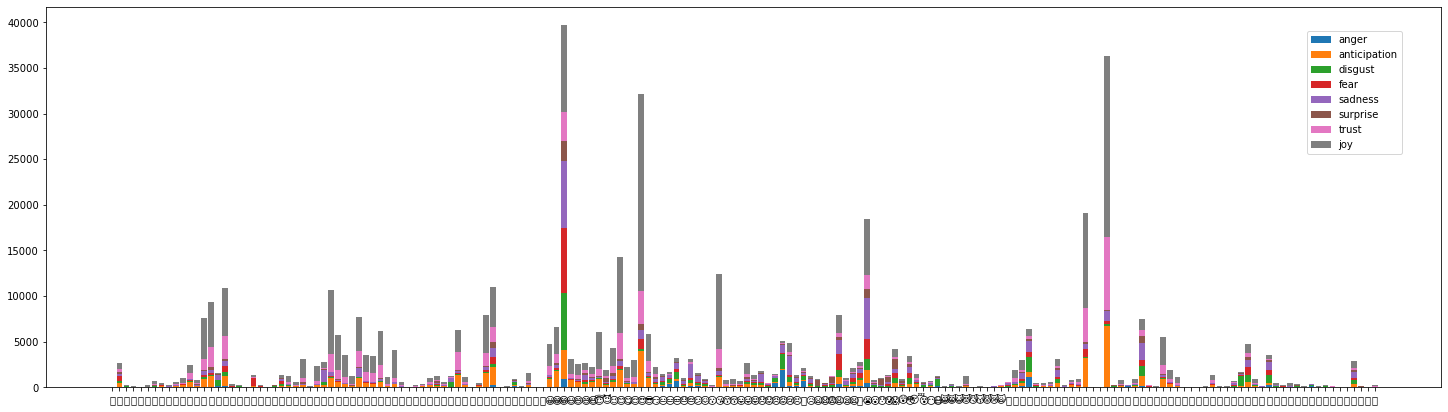

In [23]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(25,7))
bottom = np.zeros((len(df1)))
for i in range(8):
    plt.bar(list(df1.groups.keys()), list(count_emoji[:,i]), bottom=bottom, label=emotion_list[i])
    bottom += count_emoji[:,i]

plt.legend(loc="lower left",bbox_to_anchor=(0.9,0.6))
plt.show()

I try to print out the relationship between the emotion and emoji. But it seems that

training accuracy: 0.46


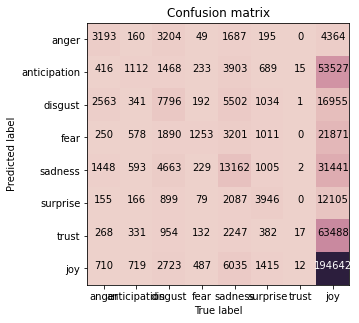

In [341]:
from sklearn.ensemble import RandomForestClassifier

Model = RandomForestClassifier(random_state=0)
y_train = train_emoji_df['emotion']
Model.fit(count_emoji, y_train)
y_train_pred = Model.predict(count_emoji)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
cm = confusion_matrix(y_true=y_train, y_pred=y_train_pred, labels=emotion_list) 
function.plot_confusion_matrix(cm, classes=emotion_list, title='Confusion matrix')

In [68]:
file = open('test_kaggle.json', 'r', encoding='utf-8')
test_df = json.loads(file.readlines()[0])
test_df = pd.DataFrame(test_df['data'], columns=test_df['columns'])
test_df[0:2]

,id,text,prepro_sent,prepro_sent_no#
0,0x28b412,"Confident of your obedience, I write to you, k...",confid of your obedi i write to you know that ...,confid of your obedi i write to you know that ...
1,0x2de201,"""Trust is not the same as faith. A friend is s...",trust is not the same as faith a friend is som...,trust is not the same as faith a friend is som...


---
Sample 500000 data to train. 

Use BOW and TFIDF to do vectorize, and then training with decisionTree, Naive Bayes and Random Forest.

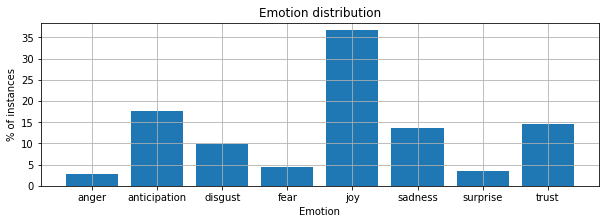

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import function # plot_confusion_matrix

train_sample = train_df.sample(500000)

labels = train_sample['emotion'].unique()
post_total = len(train_emoji)
df1 = train_sample.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

fig, ax = plt.subplots(figsize=(10,3))
plt.bar(df1.index,df1.values)
plt.ylabel('% of instances'); plt.xlabel('Emotion'); plt.title('Emotion distribution')
plt.grid(True)
plt.show()

Vectorizer is  COUNT , Model is  DT
training accuracy: 0.76


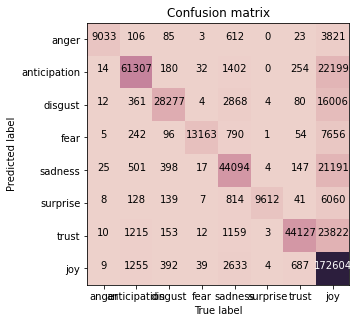

Vectorizer is  COUNT , Model is  NB
training accuracy: 0.48


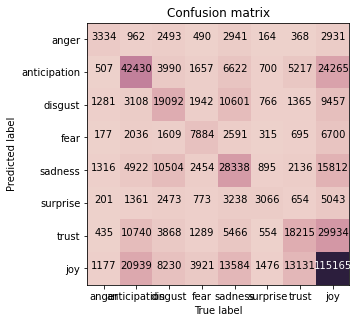

Vectorizer is  COUNT , Model is  RF
training accuracy: 0.65


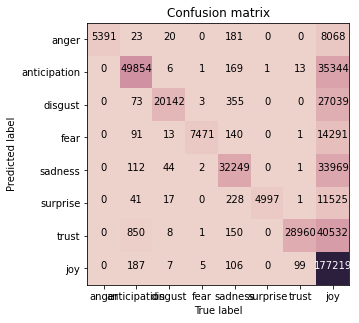

Vectorizer is  TFIDF , Model is  DT
training accuracy: 0.77


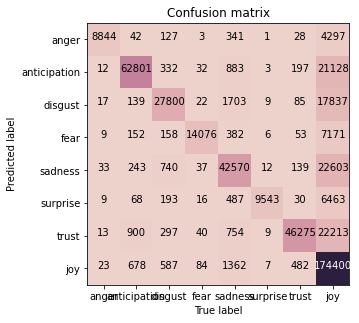

Vectorizer is  TFIDF , Model is  NB
training accuracy: 0.48


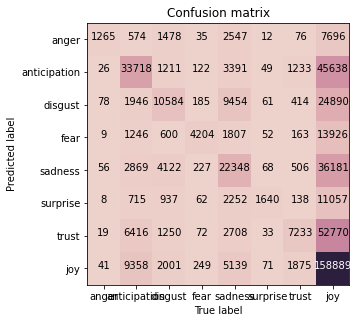

Vectorizer is  TFIDF , Model is  RF
training accuracy: 0.66


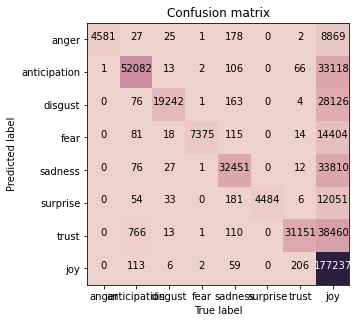

In [459]:
test_sent = test_df['prepro_sent_no#'].tolist()
train_sent, train_emo = train_sample['prepro_sent_no#'].tolist(), train_sample['emotion']

for vector in ['COUNT', 'TFIDF']:
    if vector == 'COUNT':
        Vectorizer = CountVectorizer(max_features=10000) 
    else:    
        Vectorizer = TfidfVectorizer(max_features=10000)
    Vectorizer.fit(train_sent+test_sent)

    X_train = Vectorizer.transform(train_sent)
    y_train = train_sample['emotion']
    X_test = Vectorizer.transform(test_sent)
    for model in ['DT','NB','RF']:
        if model=='DT':
            Model = DecisionTreeClassifier(max_depth=150, random_state=0)
        elif model=='NB':
            Model = MultinomialNB()
        else:
            Model = RandomForestClassifier(max_depth=100, random_state=0)
        print('Vectorizer is ', vector, ', Model is ', model)
        Model.fit(X_train, y_train)
        y_train_pred = Model.predict(X_train)
        y_test_pred = Model.predict(X_test)

        acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
        print('training accuracy: {}'.format(round(acc_train, 2)))
        cm = confusion_matrix(y_true=y_train, y_pred=y_train_pred, labels=emotion_list) 
        function.plot_confusion_matrix(cm, classes=emotion_list, title='Confusion matrix')
        submit = pd.concat([test_df['id'], pd.DataFrame(y_test_pred, columns=['emotion'])], axis=1)
        submit.to_csv(vector+'_'+model+'.csv', index=False) 

---

<div id='part2kaggle-keras'> </div>

### Part 2 Kaggle - Keras

In [ ]:
from gensim.models.word2vec import Word2Vec
size = 50; epoch = 10;
train_df['prepro_sent_no#_word'] = [sent.split(' ') for sent in train_df['prepro_sent_no#']]
test_df['prepro_sent_no#_word'] = [sent.split(' ') for sent in test_df['prepro_sent_no#']]
word2vec_data = train_df['prepro_sent_no#_word'] + test_df['prepro_sent_no#_word']

model = Word2Vec(word2vec_data, min_count=1, vector_size=size, epochs=epoch,
                    window=5, sg=1, seed=42, batch_words=100)
model.save('w2v'+str(size)+'.model')

In [9]:
train_sample = train_df.iloc[train_emoji_index]

train_sample['prepro_sent_no#_word'] = [sent.split(' ') for sent in train_sample['prepro_sent_no#']]

word2vec_model = Word2Vec.load('w2v50.model')
train_sample['prepro_sent_no#_word'] = train_sample['prepro_sent_no#_word'].apply(lambda x: x+['']*(100-len(x)) if len(x)<100 else x[0:100])
y_train = train_sample['emotion']

In [10]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(train_sample['emotion'])

def label_encode(le, labels):
    enc = le.transform(labels)
    return np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

In [11]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Reshape, Softmax
from keras.layers.recurrent import LSTM
from tensorflow import keras
from tensorflow.keras import layers

model_input = Input(shape=(100, 50))  # 500
X = model_input
X_L1 = LSTM(units=25, return_sequences=True)(X)
X_L2 = LSTM(units=15, return_sequences=True)(X_L1)
X_reshape = Reshape((1500,))(X_L2)
X_D1 = Dense(units=512, activation='relu')(X_reshape)
X_D2 = Dense(units=128, activation='relu')(X_D1)
X_D3 = Dense(units=32, activation='relu')(X_D2)
X_out = Dense(units=8, activation='softmax')(X_D3)
model_output = X_out

model = Model(inputs=[model_input], outputs=[model_output])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 50)]         0         
                                                                 
 lstm (LSTM)                 (None, 100, 25)           7600      
                                                                 
 lstm_1 (LSTM)               (None, 100, 15)           2460      
                                                                 
 reshape (Reshape)           (None, 1500)              0         
                                                                 
 dense (Dense)               (None, 512)               768512    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128  

In [20]:
def generate(data, batch_size):
    while True:
        for i in range(0, len(data), batch_size):
            x1 = np.array(data['prepro_sent_no#_word'].iloc[i:i+batch_size].apply(lambda x: word2vec_model.wv[x]).tolist())
            y1 = label_encode(label_encoder, data['emotion'].iloc[i:i+batch_size])
            yield ({'input_1': x1},{'dense_3': y1})

model.fit_generator( generate(train_sample.sample(len(train_sample)), batch_size=10000), steps_per_epoch=100, epochs=10)

<ipython-input-20-9fbb4a40dfb3>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator( generate(train_sample.sample(len(train_sample)), batch_size=20000), steps_per_epoch=50, epochs=10)


Epoch 1/10
50/50 [==============================] - 251s 5s/step - loss: 1.2328 - accuracy: 0.5472
Epoch 2/10
50/50 [==============================] - 249s 5s/step - loss: 1.2224 - accuracy: 0.5509
Epoch 3/10
50/50 [==============================] - 250s 5s/step - loss: 1.2157 - accuracy: 0.5535
Epoch 4/10
50/50 [==============================] - 248s 5s/step - loss: 1.2066 - accuracy: 0.5571
Epoch 5/10
50/50 [==============================] - 248s 5s/step - loss: 1.1975 - accuracy: 0.5609
Epoch 6/10
50/50 [==============================] - 248s 5s/step - loss: 1.1924 - accuracy: 0.5627
Epoch 7/10
50/50 [==============================] - 248s 5s/step - loss: 1.1803 - accuracy: 0.5680
Epoch 8/10
50/50 [==============================] - 241s 5s/step - loss: 1.1766 - accuracy: 0.5687
Epoch 9/10
50/50 [==============================] - 249s 5s/step - loss: 1.1701 - accuracy: 0.5713
Epoch 10/10
50/50 [==============================] - 256s 5s/step - loss: 1.1596 - accuracy: 0.5759


In [22]:
file = open('test_kaggle.json', 'r', encoding='utf-8')
test_df = json.loads(file.readlines()[0])
test_df = pd.DataFrame(test_df['data'], columns=test_df['columns'])
test_emoji_index = ['']
for i in range(len(test_df)):
    for char in test_df['text'].iloc[i]:
        if str(char.encode("unicode_escape")[5:])[2:-1] in emoji_dict.keys():
            if test_emoji_index[-1] != i:
                test_emoji_index.append(i)
test_emoji_index = test_emoji_index[1:]

test_df['prepro_sent_no#_word'] = [sent.split(' ') for sent in test_df['prepro_sent_no#']]
test_df['prepro_sent_no#_word'] = test_df['prepro_sent_no#_word'].apply(lambda x: x+['']*(100-len(x)) if len(x)<100 else x[0:100])

In [23]:
def test_generate(data, batch_size):
    for i in range(0, len(data), batch_size):
        x1 = np.array(data['prepro_sent_no#_word'].iloc[i:i+batch_size].apply(lambda x: word2vec_model.wv[x]).tolist())
        yield ({'input_1': x1})
pred_result = model.predict_generator(test_generate(test_df, batch_size=10000))
pred_result = label_decode(label_encoder, pred_result)

<ipython-input-23-550d2e201c75>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_result = model.predict_generator(test_generate(test_df, batch_size=10000))


(411972,)

In [77]:
test_df['emotion'] = pred_result
test_df[['id','emotion']].to_csv('submit_keras_0107.csv', index=False)

In [11]:
model_input = Input(shape=(100, 50))  # 500
X = model_input
X_L1 = LSTM(units=25, return_sequences=True)(X)
X_L2 = LSTM(units=15, return_sequences=True)(X_L1)
X_reshape = Reshape((1500,))(X_L2)
X_D1 = Dense(units=512, activation='relu')(X_reshape)
X_D2 = Dense(units=128, activation='relu')(X_D1)
X_D3 = Dense(units=32, activation='relu')(X_D2)
X_out = Dense(units=8, activation='softmax')(X_D3)
model_output = X_out

model = Model(inputs=[model_input], outputs=[model_output])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 50)]         0         
                                                                 
 lstm (LSTM)                 (None, 100, 25)           7600      
                                                                 
 lstm_1 (LSTM)               (None, 100, 15)           2460      
                                                                 
 reshape (Reshape)           (None, 1500)              0         
                                                                 
 dense (Dense)               (None, 512)               768512    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128  

In [ ]:
def generate(data, batch_size):
    while True:
        for i in range(0, len(data), batch_size):
            x1 = np.array(data['prepro_sent_no#_word'].iloc[i:i+batch_size].apply(lambda x: word2vec_model.wv[x]).tolist())
            y1 = label_encode(label_encoder, data['emotion'].iloc[i:i+batch_size])
            yield ({'input_1': x1}, {'dense_3': y1})

model.fit_generator( generate(train_sample.sample(len(train_sample)), batch_size=500),
        steps_per_epoch=100, epochs=10)

In [ ]:
file = open('test_kaggle.json', 'r', encoding='utf-8')
test_df = json.loads(file.readlines()[0])
test_df = pd.DataFrame(test_df['data'], columns=test_df['columns'])
test_emoji_index = ['']
for i in range(len(test_df)):
    for char in test_df['text'].iloc[i]:
        if str(char.encode("unicode_escape")[5:])[2:-1] in emoji_dict.keys():
            if test_emoji_index[-1] != i:
                test_emoji_index.append(i)
test_emoji_index = test_emoji_index[1:]

test_df['prepro_sent_no#_word'] = [sent.split(' ') for sent in test_df['prepro_sent_no#']]
test_df['prepro_sent_no#_word'] = test_df['prepro_sent_no#_word'].apply(lambda x: x+['']*(100-len(x)) if len(x)<100 else x[0:100])

In [ ]:
def test_generate(data, batch_size):
    for i in range(0, len(data), batch_size):
        x1 = np.array(data['prepro_sent_no#_word'].iloc[i:i+batch_size].apply(lambda x: word2vec_model.wv[x]).tolist())
        yield ({'input_15': x1})
pred_result = model.predict_generator(generate(test_df, batch_size=1000))
pred_result = label_decode(label_encoder, pred_result)

In [24]:
test_df = pd.read_csv('submit_bert_0105.csv')
test_df['emotion'].iloc[test_emoji_index] = pred_result[test_emoji_index]
test_df[['id','emotion']].to_csv('submit_bert_keras_0107_2.csv', index=False)